In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# 1. Introduction


## 1.1 Backgroud Information
The dataset was obtained through a hydraulic test rig,the system has **17** sensors which can keep track records over every cycle.In the project,our job was to extract valuable information from the data, and build predictive machine learning models to help us to predict specific target variable -**Internal pump leakage**.Objective of this project is to achieve a better prediction accuracy for internal pump leak,by doing so we are able to better gauge when to replace the pump.In the long run it will also help us save money since we're replacing the pumps just before the leak is predicted to occur.




## 1.2 Sensors data Introduction

Each sensor has its own data file(stored by txt file),sensors including pressures,temperature,volume flow and so on.For different sensors ,the frequence(Hz) for recording is either 1,10 or 100 per seconds,that means 60,600 or 6000 records will be created for each sensors.All the txt files download through [UCI machine Learning Database](https://archive.ics.uci.edu/ml/machine-learning-databases/00447/)

A whole description of sensors data can be find in appendix.

In [2]:
#load sensors datasets
eps1 = pd.read_csv("EPS1.txt",delim_whitespace = True,header = None)
fs1 = pd.read_csv("FS1.txt",delim_whitespace = True,header = None)
fs2 = pd.read_csv('FS2.txt',delim_whitespace = True,header = None)
ps1 = pd.read_csv('PS1.txt',delim_whitespace = True,header = None)
ps2 = pd.read_csv('PS2.txt',delim_whitespace = True,header = None)
ps3 = pd.read_csv('PS3.txt',delim_whitespace = True,header = None)
ps4 = pd.read_csv('PS4.txt',delim_whitespace = True,header = None)
ps5 = pd.read_csv('PS5.txt',delim_whitespace = True,header = None)
ps6 = pd.read_csv('PS6.txt',delim_whitespace = True,header = None)
se = pd.read_csv('SE.txt',delim_whitespace = True,header = None)
ts1 = pd.read_csv('TS1.txt',delim_whitespace = True,header = None)
ts2 = pd.read_csv('TS2.txt',delim_whitespace = True,header = None)
ts3 = pd.read_csv('TS3.txt',delim_whitespace = True,header = None)
ts4 = pd.read_csv('TS4.txt',delim_whitespace = True,header = None)
vs1 = pd.read_csv('VS1.txt',delim_whitespace = True,header = None)
ce = pd.read_csv('CE.txt',delim_whitespace = True,header = None)
cp = pd.read_csv('CP.txt',delim_whitespace = True,header = None)

## 1.3 Target Variable Introduction

4 categorical targets were given to choose for classification assignment.For this project,I chose Internal pump leakage for my target variable.Internal pump leakage can have three stages:  **0:no leakage,1: weak leakage,2: severe leakage.**

In [3]:
#load target dataset
target = pd.read_csv("profile.txt",delim_whitespace = True,header = None)

In [4]:
target.head(5)

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1


In [5]:
target.shape

(2205, 5)

In [6]:
target[2].value_counts()

0    1221
1     492
2     492
Name: 2, dtype: int64

# 2. Data Cleansing and EDA

## 2.1 Data Cleansing
### 2.1.1 Assumption
In the introduction we have mentioned each sensor has 60,600 or 6000 records(attributes) available for each instance(cycle),however we have 2205 cycles. For common machine learning tasks we would have 1 target variable input on 1 feature input,so in this case we need to figure out how to use 60,600 or 6000 records available to get only 1 record for each sensor on each instance(cycle).
Here I made a assumption that the average of those records per second will represent the sensor state for each cycle, this is not a strong assumption but I hope the predictive power from the machine learning models will be proved strong enough.

### 2.2 Cleansing
In this part we cleaned 17 datasets and build 17 new corresponding sensors series,after that we combine these new series with our target variable -- Internal pump leakage to a dataset we can further study on.

In [7]:
#calculate mean of every sensors during each instances
eps1_new = eps1.mean(axis = 1)
fs1_new = fs1.mean(axis = 1)
fs2_new = fs2.mean(axis = 1)
ps1_new = ps1.mean(axis = 1)
ps2_new = ps2.mean(axis = 1)
ps3_new = ps3.mean(axis = 1)
ps4_new = ps4.mean(axis = 1)
ps5_new = ps5.mean(axis = 1)
ps6_new = ps6.mean(axis = 1)
se_new = se.mean(axis = 1)
ts1_new = ts1.mean(axis = 1)
ts2_new = ts2.mean(axis = 1)
ts3_new = ts3.mean(axis = 1)
ts4_new = ts4.mean(axis = 1)
vs1_new = vs1.mean(axis = 1)
ce_new = ce.mean(axis = 1)
cp_new = cp.mean(axis = 1)

In [8]:
#now merge target and features(average of attributes)together
data = pd.DataFrame({'Internal pump leakage':target[2],
                     'EPS1':eps1_new,
                    'FS1':fs1_new,
                    'FS2':fs2_new,
                    'PS1':ps1_new,
                    'PS2':ps2_new,
                    'PS3':ps3_new,
                    'PS4':ps4_new,
                    'PS5':ps5_new,
                    'PS6':ps6_new,
                    'SE':se_new,
                    'TS1':ts1_new,
                    'TS2':ts2_new,
                    'TS3':ts3_new,
                    'TS4':ts4_new,
                    'VS1':vs1_new,
                    'CE':ce_new,
                    'CP':cp_new,
                    }
                    )

In [9]:
#check the shape of the data,should be 17 features + 1 target coloumn
data.shape

(2205, 18)

In [10]:
data.head(5)

,CE,CP,EPS1,FS1,FS2,Internal pump leakage,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
0,39.601350,1.862750,2538.929167,6.709815,10.304592,0,160.673492,109.466914,1.991475,0.0,9.842170,9.728097,59.157183,35.621983,40.978767,38.471017,31.745250,0.576950
1,25.786433,1.255550,2531.498900,6.715315,10.403098,0,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,59.335617,36.676967,41.532767,38.978967,34.493867,0.565850
2,22.218233,1.113217,2519.928000,6.718522,10.366250,0,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,59.543150,37.880800,42.442450,39.631950,35.646150,0.576533
3,20.459817,1.062150,2511.541633,6.720565,10.302678,0,160.188088,109.064807,1.946575,0.0,9.438827,9.337430,59.794900,38.879050,43.403983,40.403383,36.579467,0.569267
4,19.787017,1.070467,2503.449500,6.690308,10.237750,0,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,59.455267,39.803917,44.332750,41.310550,37.427900,0.577367


## 2.2 Missing Values Check

Before building every machine learning models, there are several necessary steps needed. One without doubt is to check missing values as too many missing values can affect our model performance and therefore methods like **imputation** is needed for some specific machine learning algorithms.

Since we build our model data from raw data, there should not be any missing values. However there is no harm to check.

In [11]:
#check missing values
#here I use a function I wrote before

def miss_value_table(df):
    mis_val=df.isnull().sum()
    mis_val_perc = 100 * df.isnull().sum()/len(df)
    #make a table:
    mis_val_table = pd.concat([mis_val,mis_val_perc],axis = 1)
    #rename colums:
    mis_val_rename = mis_val_table.rename(
    columns = {0: "Missing Value",1: "Percentage"})
    
    #sort the value by descending order:
    mis_val_rename = mis_val_rename[
            mis_val_rename.iloc[:,1] != 0].sort_values(
        'Percentage', ascending=False).round(1)
    return mis_val_rename
    

In [12]:
miss_value_table(data)

,Missing Value,Percentage


So we have no missing values for our dataset.

## 2.3 EDA(Exploratory data analysis)

For classfication task, graphs like boxplot,correlation heatmap can help a lot for us to understand the relationship between target and features as well as relationship within features. Specifically, to predict internal pump leakage, if we can find features that is highly correlated we can use **feature engineering** methods to design new variables that can catch the variation in target variable more precisely.

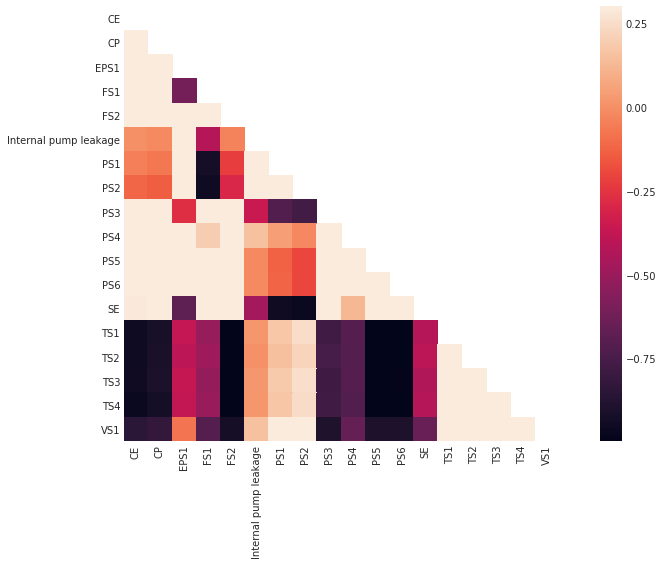

In [13]:
plt.figure(figsize=(15,8))
# calculate the correlation matrix
corr = data.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    x = sns.heatmap(corr, mask=mask, vmax=.3, square=True,xticklabels=corr.columns,yticklabels=corr.columns)

The above heatmap shows the correlation between every column in dataset,the darker each box get shows the correlation is stronger between two columns. For example, we can see for internal pump leakage column, it is comparably more correlated with **SE** and **PS3** while less correlated with other columns.

# 3. Data Preprocessing

## 3.1 Data Type

`dataframe.info` method is a quick way to look at the data type and the number of non-missing values.We can convert the columns with numbers into numeric data types by replacing the "Not Available" entries with np.nan which can be interpreted as floats if this is needed.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 18 columns):
CE                       2205 non-null float64
CP                       2205 non-null float64
EPS1                     2205 non-null float64
FS1                      2205 non-null float64
FS2                      2205 non-null float64
Internal pump leakage    2205 non-null int64
PS1                      2205 non-null float64
PS2                      2205 non-null float64
PS3                      2205 non-null float64
PS4                      2205 non-null float64
PS5                      2205 non-null float64
PS6                      2205 non-null float64
SE                       2205 non-null float64
TS1                      2205 non-null float64
TS2                      2205 non-null float64
TS3                      2205 non-null float64
TS4                      2205 non-null float64
VS1                      2205 non-null float64
dtypes: float64(17), int64(1)
memory usage: 310.2

Fair enough every columns is stored numerically and there is no missing values for imputation.

## 3.2 Train-Test Split

In machine learning, we need to split our data into train and test set:

- training set: which our model is trained on so can learn the relationship between features and target.
- test set: which we don't use to train our model and only use for the purpose for testing the model performance. So by comparing the result from test set we can know which model can be better applied in real world example.
 


In sklearn train-test split can be easily applied and random_state can be used to give consistent result.

In [15]:
label = data['Internal pump leakage']
data = data.drop(columns = 'Internal pump leakage')

In [16]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.2, random_state= 42)


## 3.3 Scaling

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

In [17]:
#check the shape of data
print('The shape of train features dataset is:',X_train.shape)
print('The shape of test features dataset is:',X_test.shape)

The shape of train features dataset is: (1764, 17)
The shape of test features dataset is: (441, 17)


Pipeline is a `sk-learn` object, a utility that provides a way to automate a machine learning workflow. It works by allowing several transformers to be chained together,for most cases we can impute missing values,scale data and so on.One can also add an estimator at the end of the pipeline.

In [18]:
#build a pipeline to scale data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

p = Pipeline([('scaler', MinMaxScaler(feature_range = (0, 1)))])

#features transformation
features = p.fit_transform(X_train)
test_features = p.transform(X_test)

# 4. Baseline Models

We will compare three different models by using sklearn library:
1. Logistic Regression
2. K-Nearest Neighbors Classification
3. Gradient Boosting Machine

To compare the model performances, we are going to use sklearn default settings. Generally the settings will perform nicely, however to acheive a better result hyperparameter optimization is needed. That's why I am going to use default settings first to know which algoriths performs better, later I will try to tune the model by optimization.

## 4.1 Logistic Regression

Logistic regression is based on the regression theory, each features were assigned a coeffiecent like linear regession models. Logistic regression model is easy to interpret as the coefficients can reflect change the features cann bring to the target, **however** logistic regression can give you lower accuracy compared to other models sometimes.

In [19]:
from sklearn.metrics import accuracy_score as acc

In [20]:
#logistic regression 
from sklearn.linear_model import LogisticRegression

logic = LogisticRegression()
logic.fit(features,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
y_test_logic = logic.predict(test_features)
print('The Accuracy of Logistic regression is: ',acc(y_test,y_test_logic))

The Accuracy of Logistic regression is:  0.7210884353741497


## 4.2 K-Nearest Neighbors Classification

The k-Nearest-Neighbors (kNN) method of classification is one of the most common methods in machine learning. At its most basic level, it is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications.

In [22]:
#KNN methods
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(features,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred_knn = knn.predict(test_features)
print('The Accuracy of KNN method is: ',acc(y_test,y_pred_knn))

The Accuracy of KNN method is:  0.9886621315192744


## 4.3 Gradient Boosting Machine

Gradient Boosting Machine is based on decision tree models,it's also is a non-linear model. Unlike Randomforest which build as many tree as possible, gbm focused on tunning existing trees by fitting over residuals. On kaggle website,to acheive better result, gbm based methods are taking a large portion on leaderboard.

In [24]:
#gbm methods
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
gbm = GradientBoostingClassifier(random_state= 42)

gbm.fit(features,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [26]:
y_pred_gbm = gbm.predict(test_features)
print('The Accuracy of GBM method is: ',acc(y_test,y_pred_gbm))

The Accuracy of GBM method is:  0.9863945578231292


## 4.4 Model Comparison

In [27]:
#model result comparison 

acc_train = [acc(y_train,logic.predict(features)),
                 acc(y_train,knn.predict(features)),
                 acc(y_train,gbm.predict(features))]

acc_test = [acc(y_test,logic.predict(test_features)),
                 acc(y_test,knn.predict(test_features)),
                 acc(y_test,gbm.predict(test_features))]

In [28]:
figsize(6,8)

plt.style.use('fivethirtyeight')

#dataframe to hold the results
model_comparison = pd.DataFrame({0:['Logistic Regression', 'K-Nearest Neighbors',
                                           'Gradient Boosted Machine'],
                                 1:acc_train,
                                 2:acc_test})

In [29]:
model_comparison = model_comparison.rename({0:"Method",
                          1: "Train Accuracy",
                          2: "Test Accuracy"},axis =1)

In [30]:
model_comparison

,Method,Train Accuracy,Test Accuracy
0,Logistic Regression,0.731293,0.721088
1,K-Nearest Neighbors,0.991497,0.988662
2,Gradient Boosted Machine,1.000000,0.986395


Text(0.5,1,'Model Comparison on Test Accuracy')

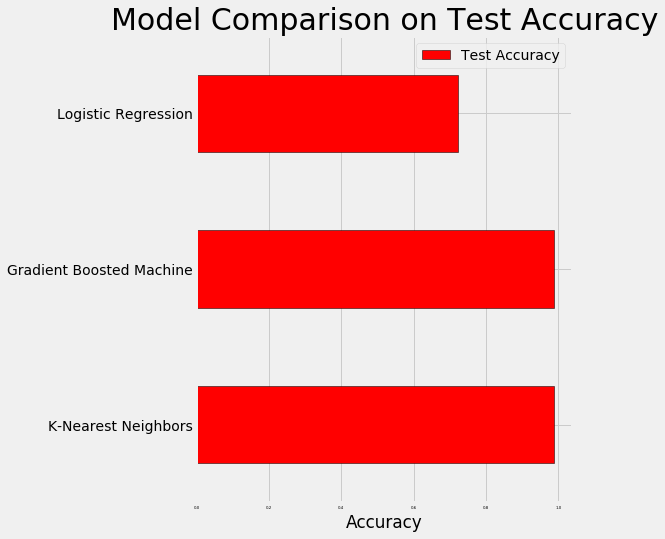

In [31]:
model_comparison.sort_values(by = "Test Accuracy",ascending = False).plot(
x = 'Method', y = 'Test Accuracy',kind = 'barh',color = "red",edgecolor = 'black');
plt.ylabel('');plt.xlabel('Accuracy');
plt.xticks(size = 4);
plt.title("Model Comparison on Test Accuracy",size  =30)

Depend on the result, **KNN** method works the best out of all three models. Logistic regression works the worst while gbm model is **overfitting** in this case. Generally gbm works better but in here since a simpler model - KNN works better so in the following I am going to tune the parameter(s) for the KNN model so we can achieve a better result.

# 5. Model Optimization
In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.In contrast to model parameters,hyperparametes are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors.

For the method of finding the best parameters, methods like grid search,random search and bayesian optimization are common methods.In our specific application case,we will try to find the best `k` to tune our model.In this part we will use random search first ,then apply grid search to find the best k.



We are going to find our best hyperparameters through random search and cross validation.
1. Random serach: This will give you a set of options, and each time randomly pick the combination of hyperparameters.
2. Grid serach: Compare to random search, this will pick every combination of hyperparameters to try it out,of course this will give the best train model however sometimes it's timeconsuming and will cause **overfitting.**

The documentation of knn parameters can be find [here.](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [32]:
# Hyperparameter tuning module
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [33]:
#Number of neighbors to use 
n_neighbors = list(np.arange(3,30,1))

#weight function used in prediction
weights = ['uniform','distance']

#define the grid of hyperparameters to search 
hyperparameters_grid = {'n_neighbors':n_neighbors,
                        'weights':weights}

#create the model to use for hyperparameter tuning 
model = KNeighborsClassifier()

#set up the random search with 4-fold cross validation (why I think it's should be 5 or 10)
random_cv = RandomizedSearchCV(estimator = model,
                               param_distributions = hyperparameters_grid,
                               cv = 4,n_iter = 5,
                               scoring ='accuracy',
                               n_jobs = -1,verbose = 1,
                               return_train_score = True,
                               random_state = 42)

#fit on the training data
random_cv.fit(features,y_train)

# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(5)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,param_weights,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.006060,0.016538,0.985261,1.000000,12,distance,"{'weights': 'distance', 'n_neighbors': 12}",1,0.981900,1.000000,0.979592,1.000000,0.984127,1.000000,0.995455,1.000000,0.000555,0.005144,0.006091,0.000000
3,0.001799,0.007884,0.984127,0.985450,9,uniform,"{'weights': 'uniform', 'n_neighbors': 9}",2,0.977376,0.984871,0.977324,0.986395,0.988662,0.986395,0.993182,0.984139,0.000119,0.000753,0.006970,0.000980
1,0.005396,0.015323,0.974490,1.000000,27,distance,"{'weights': 'distance', 'n_neighbors': 27}",3,0.970588,1.000000,0.970522,1.000000,0.975057,1.000000,0.981818,1.000000,0.005741,0.003593,0.004607,0.000000
4,0.001708,0.010341,0.963719,0.966742,25,uniform,"{'weights': 'uniform', 'n_neighbors': 25}",4,0.959276,0.965961,0.956916,0.966742,0.963719,0.968254,0.975000,0.966012,0.000128,0.002020,0.006947,0.000926
2,0.002114,0.011283,0.962585,0.966175,27,uniform,"{'weights': 'uniform', 'n_neighbors': 27}",5,0.961538,0.965961,0.954649,0.965231,0.961451,0.967498,0.972727,0.966012,0.000490,0.003303,0.006481,0.000824


Using random search is a good method to narrow down the possible hyperparameters to try. Initially, we had no idea which combination would work the best, but now we know the best `weights` to choose is 'distance'.

Continuing on finding the best `neightbors`,we will use grid search with a grid that only has the n_estimators hyperparameter. We will evaluate a range of trees then plot the training and testing performance to get an idea of what increasing the number of trees does for our model. We will fix other hyperparameters at the best values returned from random search to isolate the effect.

In [34]:
#create a range of trees to evaluate
knn_grid = {'n_neighbors': list(np.arange(2,100,1))}

model = KNeighborsClassifier(weights = 'distance')

#Grid Search object using the trees range and the random forest model 

grid_search = GridSearchCV(estimator = model,
                           param_grid = knn_grid, #not param_distributions
                           cv = 4,scoring ='accuracy',
                          verbose = 1,n_jobs = -1,return_train_score = True)  #return_train_score

#fit the train data
grid_search.fit(features,y_train)

#get the results into a dataframe 
results = pd.DataFrame(grid_search.cv_results_)

results.head(3)



Fitting 4 folds for each of 98 candidates, totalling 392 fits


[Parallel(n_jobs=-1)]: Done 392 out of 392 | elapsed:    7.2s finished


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.007390,0.011624,0.993764,1.0,2,{'n_neighbors': 2},1,0.990950,1.0,0.995465,1.0,0.993197,1.0,0.995455,1.0,0.000489,0.000700,0.001871,0.0
1,0.002035,0.006460,0.987528,1.0,3,{'n_neighbors': 3},3,0.986425,1.0,0.981859,1.0,0.988662,1.0,0.993182,1.0,0.000141,0.000373,0.004078,0.0
2,0.001978,0.007238,0.988095,1.0,4,{'n_neighbors': 4},2,0.986425,1.0,0.981859,1.0,0.988662,1.0,0.995455,1.0,0.000315,0.002002,0.004900,0.0


So we will choose `n_neighbors` = 2 and `weights` = 'distance' for our final model.
Also we can try to output the graph of different neighbors.

Text(0.5,1,'Performance vs Number of Neighbors')

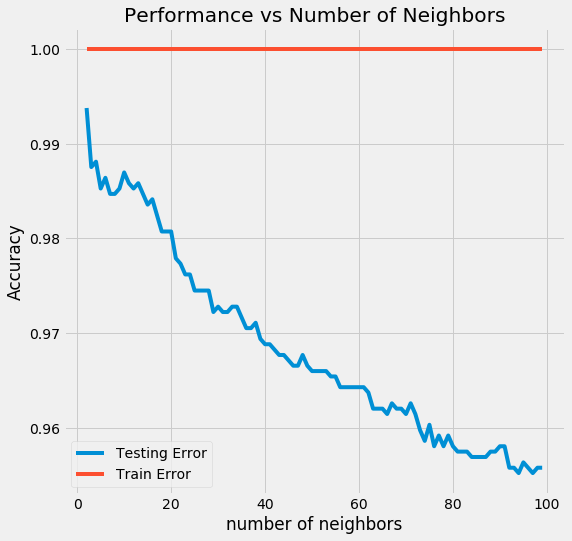

In [35]:
#plot the training and testing vs number od trees 

figsize(8,8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_neighbors'],results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],label = "Train Error")
plt.legend()
plt.xlabel('number of neighbors');plt.ylabel('Accuracy');
plt.title('Performance vs Number of Neighbors')

So now we have the optimized **KNN** model,lastly we make comparison between untuned model and tuned model.

In [36]:
#Untuned KNN methods
from sklearn.neighbors import KNeighborsClassifier
knn_untune = KNeighborsClassifier()
knn_untune.fit(features,y_train)

#tuned KNN methods
from sklearn.neighbors import KNeighborsClassifier
knn_tuned = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn_tuned.fit(features,y_train)

acc_train_knn = [acc(y_train,knn_untune.predict(features)),
                 acc(y_train,knn_tuned.predict(features))]

acc_test_knn = [acc(y_test,knn_untune.predict(test_features)),
                 acc(y_test,knn_tuned.predict(test_features))]

#dataframe to hold the results
model_comparasion_knn = pd.DataFrame({'Model':['Untuned KNN', 'Tuned KNN'],
                                      'Train Accuracy': acc_train_knn,
                                      'Test Accuracy' : acc_test_knn})

model_comparasion_knn.sort_values('Test Accuracy',ascending = False)

,Model,Test Accuracy,Train Accuracy
1,Tuned KNN,0.993197,1.000000
0,Untuned KNN,0.988662,0.991497


# 6. Conclusion

In this project, we applied several steps in machine learning task:
- Cleansing Data: This part is very common,even without machine learning models data analyst constantly need to clean their data before any analysis.
- EDA: Exploratory data analysis will give us valuable information and visually present those information for further use purpose.
- Machine Learning Model Application: Sk-learn library has made it very easy to apply almost every machine learning methods in easy and similiar steps,in this project we tried Logistic,KNN,Gradient Boosting Machine.
- Model Optimization:  This step is about fine tunning parameters to acheive a better result, for large dataset this is extremely important to offer a better predictive power.m

Looking into detail of three models we chose:
- Logistic Regression: Result has shown logistic regression works the worst for our case.Looking into the assumption of logistic regression, one is regression requires there to be little or no multicollinearity among the independent variables. This means that the independent variables should not be too highly correlated with each other.However,from the **heatmap** we clearly see there some variables like pressure sensors are highly correlated with each others.
- KNN: The algorithm is basically finding the closet points within k neighbors. It doesn't have strict assumption about data,however due to dimension issues KNN tend to work with small dataset with lower dimensions.For higher dimensions,KNN method falls into a common machine learning issue called "The curse of dimensionality".
- GBM:It builds the model in a stage-wise fashion and constanly improve the performance over weak trees. GBM method works very well on large dataset.The drawback will be requires fine tunning over a whole set of hyperparameters also sometimes training time make take a while.

The results showed us that machine learning is applicable to our problem, with the final model able to the predict the Internal pump leakage of accuracy being **0.993197**. We also saw that hyperparamter tuning was able to improve the performance of the model.

# Appendix:

- [Detailed Introduction of the dataset](https://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems)
- [Logistic Regression In Detail](https://towardsdatascience.com/logistic-regression-a-z-443a16836b5d)
- [KNN In Detail](https://medium.com/@mohtedibf/in-depth-parameter-tuning-for-knn-4c0de485baf6)
- [GBM Mechanism](https://towardsdatascience.com/boosting-algorithm-gbm-97737c63daa3)